In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams['font.size'] = 16

In [2]:
# read csv files
file_dir = '../csv_files/'
train_set = 'dips'
test_set = 'db5_test'
model = 'model_0'
num_samples = 120
num_steps = 40

df_list = []
for i in range(1):
    file_name = f'{test_set}_{model}_{num_samples}_samples_{num_steps}_steps_{train_set}_{i}'
    df = pd.read_csv(f'{file_dir}{file_name}.csv')
    df_list.append(df)

In [3]:
df_sr_list = []
for df in df_list:
    result_df = df.copy().sort_values(by='energy', ascending=True).groupby('id')
    top1 = result_df.head(1).copy()
    top5 = result_df.head(5).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    top10 = result_df.head(10).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    top25 = result_df.head(25).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    top40 = result_df.head(40).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    best = df.sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    # merge dataframes
    top1['method'] = 'Top-1'
    top5['method'] = 'Top-5'
    top10['method'] = 'Top-10'
    top25['method'] = 'Top-25'
    best['method'] = 'Oracle'

    # merge the dataframes 
    df_merged = pd.concat([top1, top5, top10, top25, best])

    # get the order
    cols = ['Top-1', 'Top-5', 'Top-10', 'Top-25', 'Oracle']

    df_merged['method'] = pd.Categorical(df_merged['method'], categories=cols, ordered=True)

    # separate for each metric
    df_DockQ = df_merged.pivot(index='id', columns='method', values='DockQ')[cols]

    df_sr = pd.DataFrame()
    df_sr['Acceptable'] = df_DockQ[(df_DockQ >= 0.23)].count() / df_DockQ.shape[0]
    df_sr['Medium'] = df_DockQ[(df_DockQ >= 0.49)].count() / df_DockQ.shape[0]
    df_sr['High'] = df_DockQ[(df_DockQ >= 0.8)].count() / df_DockQ.shape[0]
    df_sr = df_sr.reset_index()
    df_sr_list.append(df_sr)

df_sr = pd.concat(df_sr_list)

In [4]:
df = pd.concat(df_list)
result_df = df.copy().sort_values(by='energy', ascending=True).groupby('id')
top1 = result_df.head(1).copy()
top5 = result_df.head(5).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
top10 = result_df.head(10).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
top25 = result_df.head(25).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
top40 = result_df.head(40).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
best = df.sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
# merge dataframes
top1['method'] = 'Top-1'
top5['method'] = 'Top-5'
top10['method'] = 'Top-10'
top25['method'] = 'Top-25'
best['method'] = 'Oracle'

# merge the dataframes 
df_merged = pd.concat([top1, top5, top10, top25, best])

# get the order
cols = ['Top-1', 'Top-5', 'Top-10', 'Top-25', 'Oracle']

df_merged['method'] = pd.Categorical(df_merged['method'], categories=cols, ordered=True)

# separate for each metric
df_DockQ = df_merged.pivot(index='id', columns='method', values='DockQ')[cols]

df_sr = pd.DataFrame()
df_sr['Acceptable'] = df_DockQ[(df_DockQ >= 0.23)].count() / df_DockQ.shape[0]
df_sr['Medium'] = df_DockQ[(df_DockQ >= 0.49)].count() / df_DockQ.shape[0]
df_sr['High'] = df_DockQ[(df_DockQ >= 0.8)].count() / df_DockQ.shape[0]
df_sr = df_sr.reset_index()

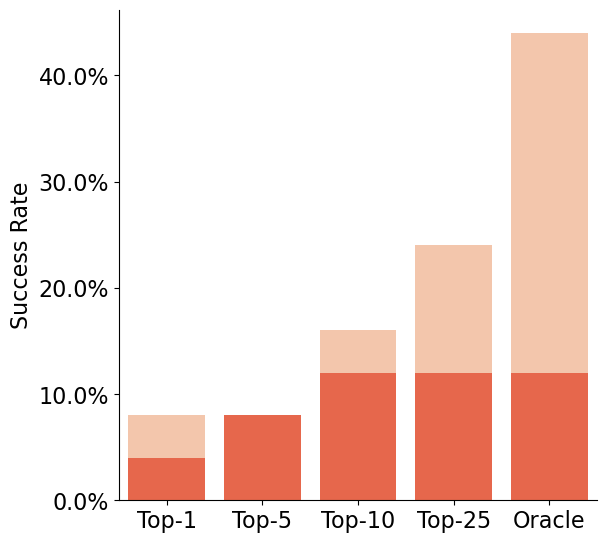

In [7]:
melted_df = pd.melt(df_sr, id_vars='method', var_name='Quality', value_name='Success Rate')

# Define custom colors for pastel red, muted red, and dark red
custom_palette = ["#FFC3A0", "#FF5733", "#8B0000"]

g = sns.catplot(
    data=melted_df, 
    kind='bar', 
    x='method', 
    y='Success Rate', 
    hue='Quality', 
    dodge=False, 
    palette=custom_palette,
    height=6,
    aspect=1,
    legend_out=True,
    legend=False,
) 

g.set_xlabels("")
g.ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#plt.ylim(0, 0.5)
plt.xticks(rotation=0)
plt.show()